## Import Libraries
Import necessary libraries for data processing, visualization, and model evaluation.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

## Load Dataset
Load the dataset to analyze customer behavior and prepare it for modeling.

In [2]:
data = pd.read_csv('customer_behavior_data.csv')
print("Original Dataset:")
print(data.head())

Original Dataset:
       x1        x2     x3            x4         x5  x6  y
0    Male     Rural  46-55  74472.158735  39.799935   8  0
1  Female  Suburban  46-55  44027.532707  46.048912   6  0
2    Male  Suburban  46-55  61630.676994  45.790177   5  0
3    Male  Suburban  46-55  61586.454705  40.940361   8  0
4    Male  Suburban  46-55  73810.000736  41.761206   3  0


## Define Independent and Dependent Variables
Separate the dataset into:
- `X`: Features used for prediction.
- `y`: Target variable.

In [3]:
X = data.drop('y', axis=1)  # Features
y = data['y']               # Target variable
print("\nFeatures (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Features (X):
       x1        x2     x3            x4         x5  x6
0    Male     Rural  46-55  74472.158735  39.799935   8
1  Female  Suburban  46-55  44027.532707  46.048912   6
2    Male  Suburban  46-55  61630.676994  45.790177   5
3    Male  Suburban  46-55  61586.454705  40.940361   8
4    Male  Suburban  46-55  73810.000736  41.761206   3

Target (y):
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


## Create New Feature: `x7`
Add a new feature `x7` to enrich the dataset and potentially improve model performance.
- `x7` is created as a random variable to provide additional predictive information.


In [4]:
X['x7'] = np.random.rand(len(X))
print("\nFeatures after adding x7:")
print(X.head())


Features after adding x7:
       x1        x2     x3            x4         x5  x6        x7
0    Male     Rural  46-55  74472.158735  39.799935   8  0.840497
1  Female  Suburban  46-55  44027.532707  46.048912   6  0.860528
2    Male  Suburban  46-55  61630.676994  45.790177   5  0.295763
3    Male  Suburban  46-55  61586.454705  40.940361   8  0.867159
4    Male  Suburban  46-55  73810.000736  41.761206   3  0.634484


## Handling Range Values and One-Hot Encoding
Process categorical features to make them usable for machine learning algorithms:
- **Map Ranges to Midpoints**: Convert categorical age ranges (e.g., '18-25') to their midpoint for simplified modeling.
- **One-Hot Encoding**: Apply encoding to categorical features to transform them into numeric values.


In [5]:
age_mapping = {
    '18-25': 21.5,
    '26-35': 30.5,
    '36-45': 40.5,
    '46-55': 50.5,
    '56+': 60  
}

# Manually apply OneHotEncoding to categorical features
cat_features = X[['x1', 'x2']]  # x1 and x2 are categorical
onehot_encoder = OneHotEncoder(sparse=False, drop="first")  # Drop first to avoid dummy variable trap
onehot_encoded = onehot_encoder.fit_transform(cat_features)

# Create a DataFrame with the new one-hot encoded columns
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(['x1', 'x2']))

# Concatenate the one-hot encoded columns with the original features (excluding the original categorical columns)
X = pd.concat([X.drop(['x1', 'x2'], axis=1).reset_index(drop=True), onehot_encoded_df.reset_index(drop=True)], axis=1)
X['x3'] = X['x3'].map(age_mapping)
print("\nFeatures after OneHotEncoding:")
print(X.head())


Features after OneHotEncoding:
     x3            x4         x5  x6        x7  x1_Male  x2_Suburban  x2_Urban
0  50.5  74472.158735  39.799935   8  0.840497      1.0          0.0       0.0
1  50.5  44027.532707  46.048912   6  0.860528      0.0          1.0       0.0
2  50.5  61630.676994  45.790177   5  0.295763      1.0          1.0       0.0
3  50.5  61586.454705  40.940361   8  0.867159      1.0          1.0       0.0
4  50.5  73810.000736  41.761206   3  0.634484      1.0          1.0       0.0


c:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## StandardScaler
Apply standard scaling to normalize feature values, which can improve model performance by ensuring all features have similar ranges.


In [6]:
scaler = StandardScaler()
X[['x3', 'x4', 'x5', 'x6', 'x7']] = scaler.fit_transform(X[['x3', 'x4', 'x5', 'x6', 'x7']])
print("\nFeatures after scaling:")
print(X.head())



Features after scaling:
         x3        x4        x5        x6        x7  x1_Male  x2_Suburban  \
0  0.962522  1.011414 -0.607034  1.168505  1.261968      1.0          0.0   
1  0.962522 -0.867265 -0.242909  0.365409  1.338228      0.0          1.0   
2  0.962522  0.218991 -0.257986 -0.036139 -0.811889      1.0          1.0   
3  0.962522  0.216262 -0.540582  1.168505  1.363473      1.0          1.0   
4  0.962522  0.970553 -0.492752 -0.839236  0.477658      1.0          1.0   

   x2_Urban  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  


<Axes: >

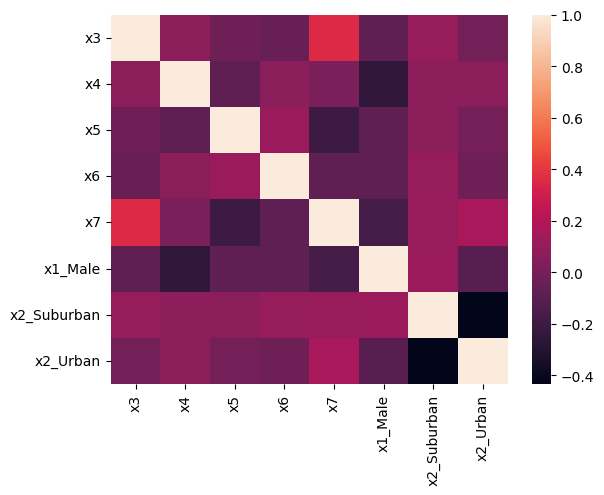

In [7]:
correlation = X.corr()
sns.heatmap(correlation)

## Split Dataset
Divide the dataset into training and test sets to evaluate model performance on unseen data.


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining Features (X_train):")
print(X_train.head())
print("\nTesting Features (X_test):")
print(X_test.head())


Training Features (X_train):
          x3        x4        x5        x6        x7  x1_Male  x2_Suburban  \
55 -1.243178 -0.832305  0.678331  0.365409  0.207081      0.0          0.0   
88 -0.558650  1.767165 -1.536387  1.971601 -0.799215      0.0          0.0   
26 -1.243178  0.107773 -0.784530 -1.642332  0.186313      0.0          0.0   
42 -0.558650  0.000251 -1.950225 -0.839236  1.653591      0.0          0.0   
69  0.962522  1.969929  1.860571  0.365409  0.744065      0.0          0.0   

    x2_Urban  
55       1.0  
88       1.0  
26       1.0  
42       1.0  
69       1.0  

Testing Features (X_test):
          x3        x4        x5        x6        x7  x1_Male  x2_Suburban  \
83 -1.243178  0.509268 -1.040667  0.365409 -0.341661      0.0          0.0   
53  0.201936  1.404610 -0.983886  1.168505 -1.814200      0.0          0.0   
70  0.201936 -0.992502 -0.312119  1.570053 -0.751381      0.0          0.0   
45 -1.243178  1.549872  1.462717  1.570053  0.048984      0.0          

## Train, Predict, and Evaluate Model
Train the machine learning model on the training set and assess its performance on the test set.
- Use evaluation metrics such as accuracy, F1 score, and confusion matrix to analyze results.


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')
    print(f'{name} F1 Score: {f1}')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # sns.heatmap(cm, annot=True, fmt='d')
    # plt.title(f'{name} Confusion Matrix')
    # plt.xlabel('Predicted')
    # plt.ylabel('True')
    # plt.show()
    print(cm)


Logistic Regression Accuracy: 0.9
Logistic Regression F1 Score: 0.9166666666666666
[[ 7  2]
 [ 0 11]]
Decision Tree Accuracy: 0.8
Decision Tree F1 Score: 0.8333333333333333
[[ 6  3]
 [ 1 10]]
Random Forest Accuracy: 0.85
Random Forest F1 Score: 0.8695652173913043
[[ 7  2]
 [ 1 10]]
